In [201]:
# MACHINE LEARNING CLASSIFICATION MODELS - RIFAZ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
from pandas_profiling import ProfileReport
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics,model_selection
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn import metrics
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import eli5
from eli5.sklearn import PermutationImportance
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")

**1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.**

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [ ]:
report = ProfileReport(df)
report.to_file("Report.html")

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
num_df = df.select_dtypes(exclude=['object'])

for i in num_df.columns:
    print("Skewness for", i,"is: ",round(num_df[i].skew(),2))

Skewness for age is:  0.14
Skewness for economic.cond.national is:  -0.24
Skewness for economic.cond.household is:  -0.14
Skewness for Blair is:  -0.54
Skewness for Hague is:  0.15
Skewness for Europe is:  -0.14
Skewness for political.knowledge is:  -0.42


**1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

In [12]:
df.shape

(1517, 9)

In [13]:
num_df.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

In [14]:
cat_df=df[['vote','gender']]
cat_df.value_counts()

vote          gender
Labour        female    551
              male      506
Conservative  female    257
              male      203
dtype: int64

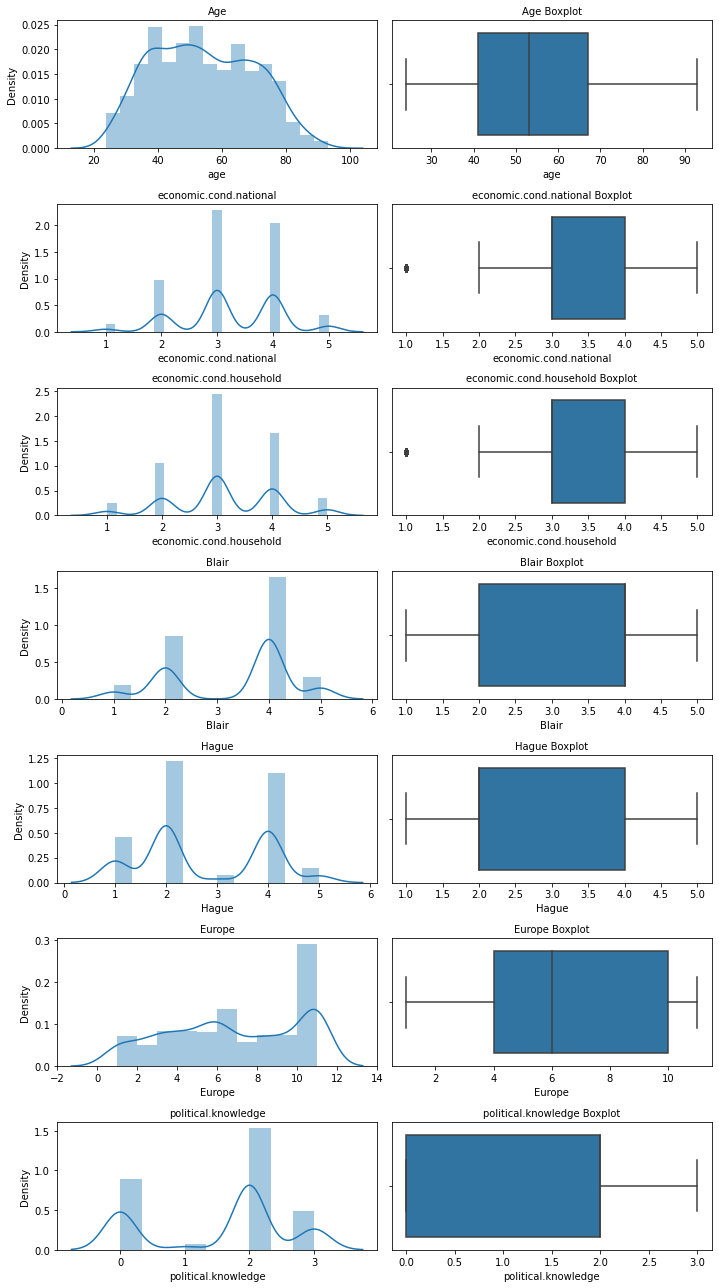

In [15]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age",fontsize=10)
a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national",fontsize=10)
a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household",fontsize=10)
a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=10)
a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague",fontsize=10)
a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe",fontsize=10)
a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge",fontsize=10)
a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# sns.pairplot(df);

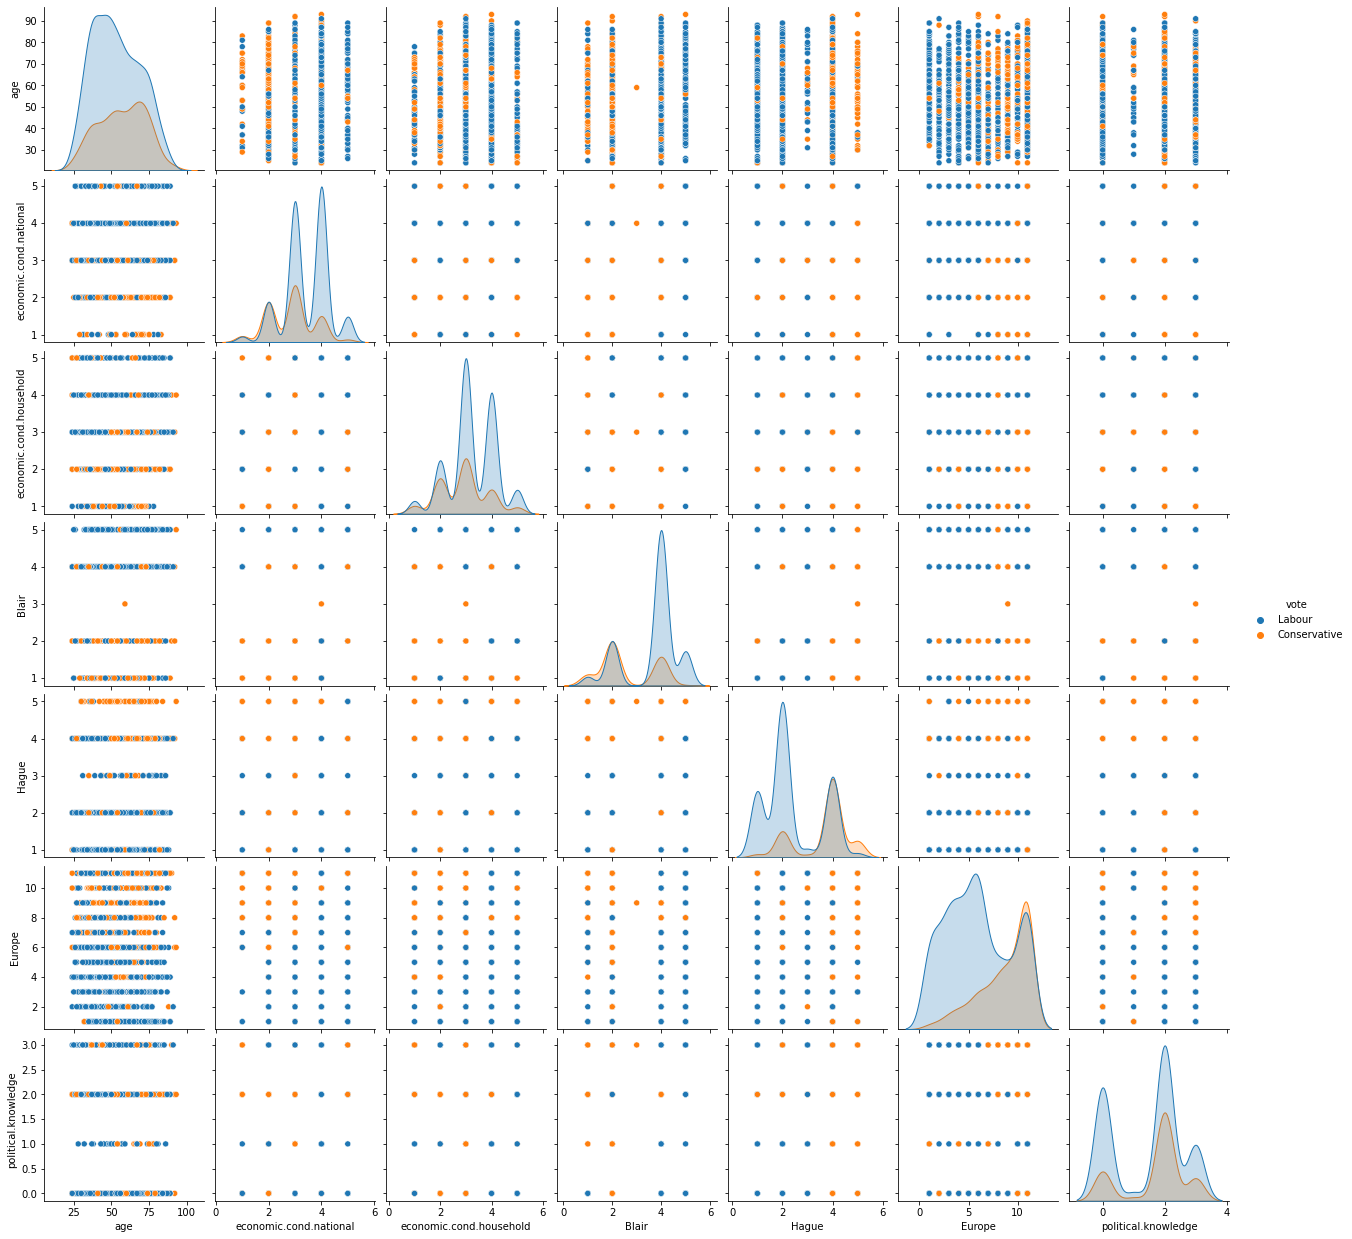

In [16]:
sns.pairplot(df,hue='vote')

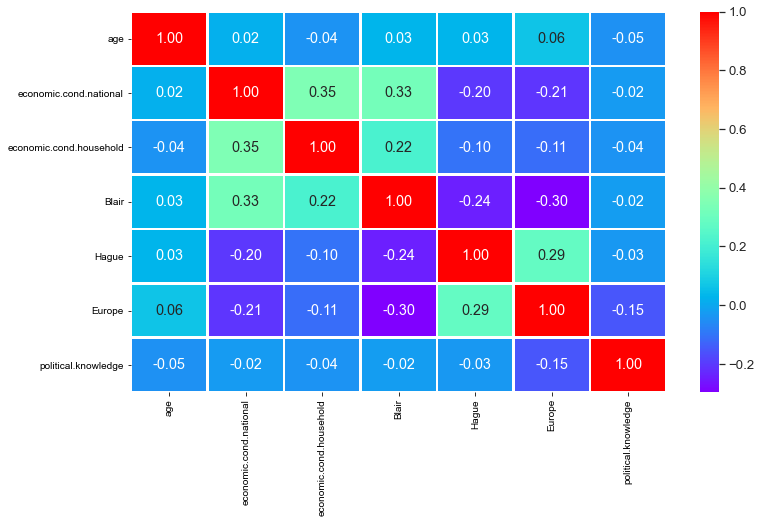

In [17]:
corr = df.corr()

f,ax = plt.subplots(figsize=(12,7))
sns.set(font_scale=1.2)
sns.heatmap(corr,annot=True,fmt='.2f',cmap='rainbow',linewidths=1.5)
plt.show()

<AxesSubplot:xlabel='vote', ylabel='count'>

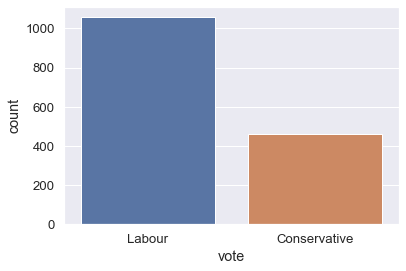

In [18]:
sns.countplot('vote',data=df)

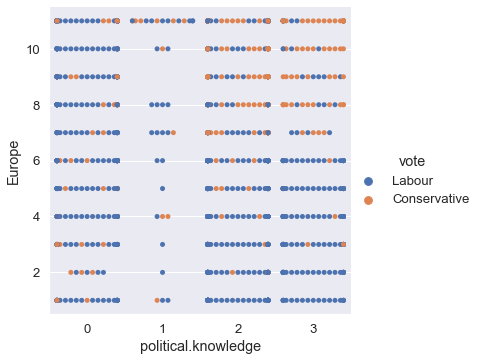

In [19]:
sns.catplot(data=df, kind="swarm", x="political.knowledge", y="Europe", hue="vote")

<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

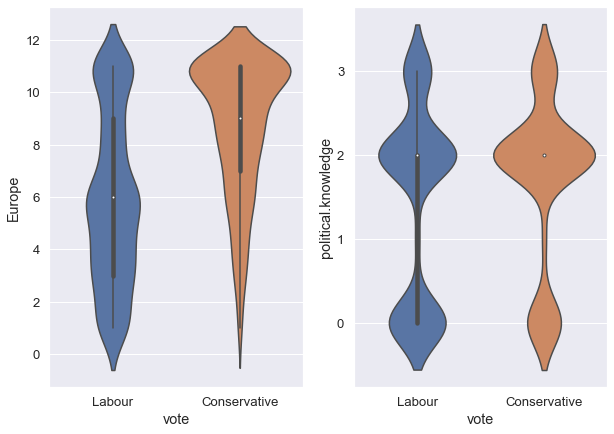

In [20]:
f,ax=plt.subplots(1,2,figsize=(10,7))
sns.violinplot(x='vote',y='Europe',data=df,ax=ax[0])
sns.violinplot(x='vote',y='political.knowledge',data=df,ax=ax[1])

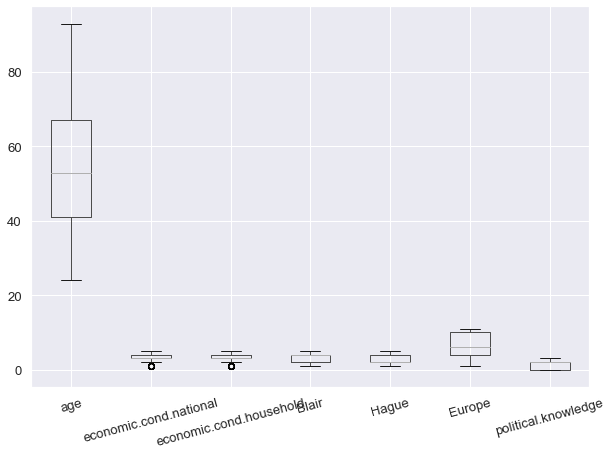

In [21]:
plt.figure(figsize=(10,7))
num_df.boxplot()
plt.xticks(rotation = 15) 
plt.show()

In [22]:
def proportion_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=proportion_outlier(df[column])
        x=df[df[column] < lr].count()[column]
        y=df[df[column] > ur].count()[column]
        print((x + y)/df.shape[0])

0.0
0.024390243902439025
0.04284772577455504
0.0
0.0
0.0
0.0


In [24]:
data = pd.DataFrame([[0.0],[0.024262295081967214],[0.04262295081967213],[0.0],[0.0],[0.0],[0.0]],columns = ['outlier proprotion %'],
                    index = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'])
round(data*100,2)

,outlier proprotion %
age,0.00
economic.cond.national,2.43
economic.cond.household,4.26
Blair,0.00
Hague,0.00
Europe,0.00
political.knowledge,0.00


**1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.**

# <font color='red'>Binning</font> 

In [ ]:
s_df=df.copy()
s_df['age']=pd.cut(x=df['age'],bins=[20,30,40,60,93],labels=['young','adults','mid-age','seniors'])

In [ ]:
s_df['age'].value_counts(normalize=True)

In [ ]:
s_df.groupby(['age','vote']).size()

In [ ]:
s_df.head()

# <font color='red'>Encoding</font>

In [ ]:
s_df['age']= pd.Categorical(s_df['age']).codes

In [ ]:
s_df['vote']= pd.Categorical(s_df['vote']).codes
s_df['gender']= pd.Categorical(s_df['gender']).codes

In [25]:
df['vote']= pd.Categorical(df['vote']).codes
df['gender']= pd.Categorical(df['gender']).codes

In [ ]:
s_df.sample(10)

In [ ]:
# print(pd.Categorical(s_df['age'].unique()))
# print(pd.Categorical(s_df['age'].unique()).codes)
s_df.info()

In [26]:
df['vote'].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [27]:
df.sample(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1416,0,66,3,2,2,4,6,2,1
1119,0,37,3,3,4,4,10,2,0
430,0,39,3,4,2,4,11,2,0
1064,1,74,4,4,5,2,11,0,0
1076,0,72,3,3,4,4,8,3,1


In [28]:
df.var()

vote                         0.211421
age                        246.544655
economic.cond.national       0.777558
economic.cond.household      0.866890
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender                       0.249099
dtype: float64

In [29]:
df.std()

vote                        0.459805
age                        15.701741
economic.cond.national      0.881792
economic.cond.household     0.931069
Blair                       1.174772
Hague                       1.232479
Europe                      3.299043
political.knowledge         1.084417
gender                      0.499099
dtype: float64

In [ ]:
# df =pd.get_dummies(df, columns=cat1,drop_first=True)

In [ ]:
# df.columns

In [ ]:
# df.sample(10)

# <font color='red'>Train and Test Split</font>

In [ ]:
# Arrange data into independent variables and dependent variables
X = s_df.drop("vote",axis=1)  ## Features
y = s_df[["vote"]]  ## Target

In [30]:
X = df.drop("vote",axis=1)  ## Features
y = df[["vote"]]  ## Target

In [31]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=df['vote'], random_state=1)

In [32]:
print("Number of X_train dataset: ", X_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("Number of X_test dataset: ", X_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (1061, 8)
Number of y_train dataset:  (1061, 1)
Number of X_test dataset:  (456, 8)
Number of y_test dataset:  (456, 1)


In [33]:
y_train.value_counts(normalize=True)

vote
1       0.696513
0       0.303487
dtype: float64

In [34]:
y_test.value_counts(normalize=True)

vote
1       0.697368
0       0.302632
dtype: float64

# <font color='red'>SMOTE</font>

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train.vote == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train.vote == 0)))

In [ ]:
sm = SMOTE(random_state = 1)

In [ ]:
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train.vote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train.vote == 0)))

In [ ]:
df1=pd.concat([X_train,y_train],axis=1)

In [ ]:
df1.head()

In [ ]:
df1.to_csv('smote.csv')

In [ ]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.head()

In [ ]:
X = df1.drop("vote",axis=1)  ## Features
y = df1[["vote"]]  ## Target

In [ ]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
print("Number of X_train dataset after SMOTE: ", X_train.shape)
print("Number of y_train dataset: after SMOTE", y_train.shape)

In [ ]:
y_train.value_counts(normalize=True)

# <font color='red'>Logistic Regression</font>

Training

In [ ]:
# log_model = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)
# log_model.fit(X_train, y_train)

Model Tuning

In [35]:
log_model=LogisticRegression(random_state=1)
# log_model.fit(X_train, y_train)

In [36]:
param_grid = {
    'solver': ['lbfgs','newton-cg','liblinear'],
    'max_iter':[25,50,100],
    'penalty' : ['l1', 'l2', 'none'],
    'tol': [0.0001,0.000001,0.00000001] 
}

# lgtcl = LogisticRegression(random_state=1)

grid_search = GridSearchCV(estimator = log_model, param_grid = param_grid,scoring='f1', cv = 3)

In [37]:
grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [25, 50, 100],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-06, 1e-08]},
             scoring='f1')

Best Parameters

In [38]:
grid_search.best_params_

{'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06}

In [39]:
grid_search.best_estimator_

LogisticRegression(max_iter=50, penalty='l1', random_state=1,
                   solver='liblinear', tol=1e-06)

In [40]:
log_model=grid_search.best_estimator_

Predicting on Training dataset & Testing Dataset

In [41]:
ytrain_predict = log_model.predict(X_train)
# ytrain_predict = log_model.predict(X_train_res)
ytest_predict = log_model.predict(X_test)

Accuracy score for both training & testing dataset

In [42]:
log_train_acc=log_model.score(X_train, y_train)
# log_train_acc=log_model.score(X_train_res, y_train_res)
log_test_acc=log_model.score(X_test, y_test)

In [43]:
print(log_train_acc*100)
print(log_test_acc*100)

82.7521206409048
85.74561403508771


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 0.877


Text(0, 0.5, 'True positive Rate')

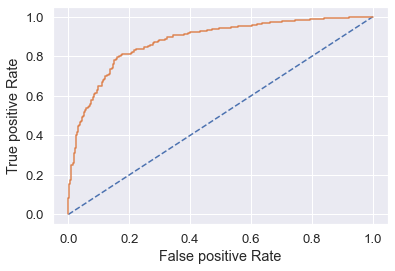

In [44]:
# predict probabilities
probs = log_model.predict_proba(X_train)
# probs = log_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
log_train_auc=roc_auc_score(y_train, probs)
# log_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Testing Data<br>
AUC and ROC for the Testing data

AUC: 0.913


Text(0, 0.5, 'True positive Rate')

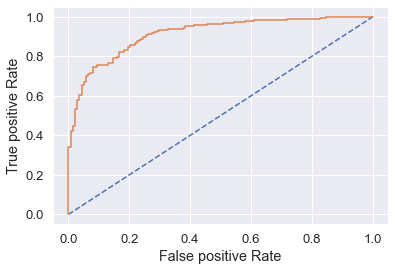

In [45]:
# predict probabilities
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [46]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = log_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = log_model.predict(X_test)

Text(0.5, 19.5, 'Predicted label')

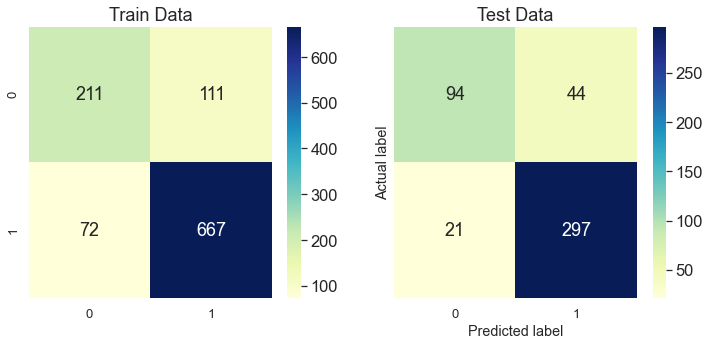

In [47]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.5)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [48]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



With different threshold values

In [49]:
# Training Data Probability Prediction
pred_prob_train = log_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = log_model.predict_proba(X_test)

In [50]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    print('precision Score',round(metrics.precision_score(y_train,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.7182
F1 Score 0.8314 

precision Score 0.7128 

0.2 

Accuracy Score 0.7653
F1 Score 0.8531 

precision Score 0.7563 

0.3 

Accuracy Score 0.787
F1 Score 0.8622 

precision Score 0.7847 

0.4 

Accuracy Score 0.8124
F1 Score 0.8735 

precision Score 0.8237 

0.5 

Accuracy Score 0.8275
F1 Score 0.8794 

precision Score 0.8573 

0.6 

Accuracy Score 0.8172
F1 Score 0.8669 

precision Score 0.879 

0.7 

Accuracy Score 0.8124
F1 Score 0.8569 

precision Score 0.9141 

0.8 

Accuracy Score 0.7512
F1 Score 0.7957 

precision Score 0.9295 

0.9 

Accuracy Score 0.6513
F1 Score 0.6766 

precision Score 0.9556 



In [51]:
threshold=0.5
predicted = (log_model.predict_proba(X_test)[:,1]>=threshold).astype('int')

In [52]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



Feature Importances

In [53]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(log_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0930 ± 0.0249,Hague
0.0548 ± 0.0173,Blair
0.0399 ± 0.0302,Europe
0.0167 ± 0.0168,economic.cond.national
0.0110 ± 0.0062,age
0.0110 ± 0.0149,political.knowledge
0 ± 0.0000,gender
-0.0009 ± 0.0035,economic.cond.household


In [54]:
log_metrics=classification_report(y_train,pred_class_train,output_dict=True)
lgdf=pd.DataFrame(log_metrics).transpose()
log_train_f1_h=round(lgdf.loc["0"][2],2)
log_train_recall_h=round(lgdf.loc["0"][1],2)
log_train_precision_h=round(lgdf.loc["0"][0],2)
log_train_f1=round(lgdf.loc["1"][2],2)
log_train_recall=round(lgdf.loc["1"][1],2)
log_train_precision=round(lgdf.loc["1"][0],2)
# print ('log_train_precision ',log_train_precision)
# print ('log_train_recall ',log_train_recall)
# print ('log_train_f1 ',log_train_f1)
log_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
lgdf_test=pd.DataFrame(log_metrics_test).transpose()
log_test_precision_h=round(lgdf_test.loc["0"][0],2)
log_test_recall_h=round(lgdf_test.loc["0"][1],2)
log_test_f1_h=round(lgdf_test.loc["0"][2],2)
log_test_precision=round(lgdf_test.loc["1"][0],2)
log_test_recall=round(lgdf_test.loc["1"][1],2)
log_test_f1=round(lgdf_test.loc["1"][2],2)
# print ('log_test_precision ',log_test_precision)
# print ('log_test_recall ',log_test_recall)
# print ('log_test_f1 ',log_test_f1)
# lgdf

# <font color='red'>Linear Discriminant Analysis</font>

In [55]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [56]:
lda_model = LinearDiscriminantAnalysis()

Training

In [ ]:
# lda_model=lda.fit(X_train,y_train)

Model tuning

In [57]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [0.0001,0.00001,0.001] 
}

grid_search = GridSearchCV(estimator = lda_model, param_grid = param_grid,scoring='f1', cv = 3)

In [58]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05, 0.001]},
             scoring='f1')

Best Parameters

In [59]:
grid_search.best_params_

{'solver': 'lsqr', 'tol': 0.0001}

In [60]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(solver='lsqr')

In [61]:
lda_model=grid_search.best_estimator_

Predicting on Training & Test dataset

In [62]:
ytrain_predict = lda_model.predict(X_train)
# ytrain_predict = log_model.predict(X_train_res)
ytest_predict = lda_model.predict(X_test)

Accuracy score for training

In [63]:
lda_train_acc=lda_model.score(X_train, y_train)
# lda_train_acc=lda_model.score(X_train_res, y_train_res)
lda_test_acc=lda_model.score(X_test, y_test)

In [64]:
print(lda_train_acc*100)
print(lda_test_acc*100)

82.2808671065033
85.30701754385966


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 0.877


Text(0, 0.5, 'True positive Rate')

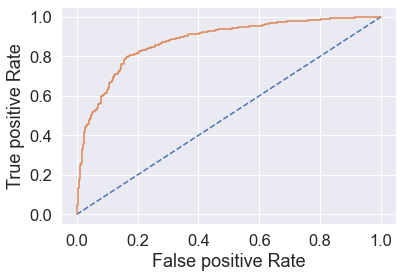

In [65]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# probs = lda_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
lda_train_auc=roc_auc_score(y_train, probs)
# lda_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the Testing data

AUC: 0.914


Text(0, 0.5, 'True positive Rate')

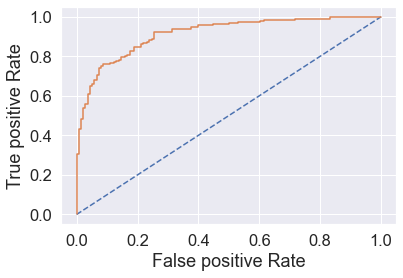

In [66]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [67]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

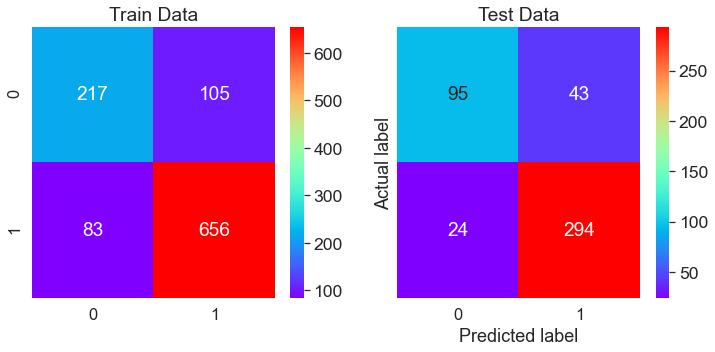

In [68]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [69]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



Feature Importance

In [70]:
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(lda_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0860 ± 0.0249,Hague
0.0412 ± 0.0442,Blair
0.0329 ± 0.0166,Europe
0.0206 ± 0.0267,political.knowledge
0.0136 ± 0.0075,economic.cond.national
0.0057 ± 0.0066,age
-0.0022 ± 0.0000,gender
-0.0022 ± 0.0028,economic.cond.household


In [71]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
ldadf=pd.DataFrame(lda_metrics).transpose()
lda_train_f1_h=round(ldadf.loc["0"][2],2)
lda_train_recall_h=round(ldadf.loc["0"][1],2)
lda_train_precision_h=round(ldadf.loc["0"][0],2)
lda_train_f1=round(ldadf.loc["1"][2],2)
lda_train_recall=round(ldadf.loc["1"][1],2)
lda_train_precision=round(ldadf.loc["1"][0],2)
# print ('lda_train_precision ',lda_train_precision)
# print ('lda_train_recall ',lda_train_recall)
# print ('lda_train_f1 ',lda_train_f1)
lda_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
ldadf_test=pd.DataFrame(lda_metrics_test).transpose()
lda_test_precision_h=round(ldadf_test.loc["0"][0],2)
lda_test_recall_h=round(ldadf_test.loc["0"][1],2)
lda_test_f1_h=round(ldadf_test.loc["0"][2],2)
lda_test_precision=round(ldadf_test.loc["1"][0],2)
lda_test_recall=round(ldadf_test.loc["1"][1],2)
lda_test_f1=round(ldadf_test.loc["1"][2],2)
# print ('lda_test_precision ',lda_test_precision)
# print ('lda_test_recall ',lda_test_recall)
# print ('lda_test_f1 ',lda_test_f1)
# ldadf

# <font color='red'>KNN Model</font>

In [72]:
X_scaled=X.copy()

In [73]:
X_scaled[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]=X_scaled[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']].apply(zscore)
# df.columns

In [74]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [75]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [76]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [77]:
# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier()

Model tuning

In [78]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.18201754385964908,
 0.17763157894736847,
 0.17105263157894735,
 0.17763157894736847,
 0.17324561403508776,
 0.16666666666666663,
 0.16666666666666663,
 0.17105263157894735,
 0.17105263157894735]

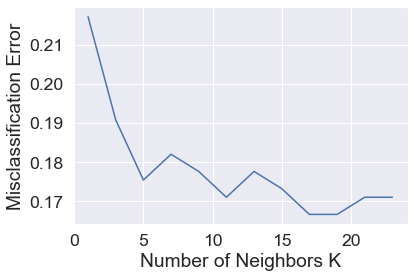

In [79]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,25,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Best Parameters

Training

In [80]:
KNN_model=KNeighborsClassifier(n_neighbors=17,weights='distance')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17, weights='distance')

Predicting on Training dataset & Testing Dataset

In [81]:
ytrain_predict = KNN_model.predict(X_train)
# ytrain_predict = KNN_model.predict(X_train_res)
ytest_predict = KNN_model.predict(X_test)

Accuracy score for both training & testing dataset

In [82]:
KNN_train_acc=KNN_model.score(X_train, y_train)
# KNN_train_acc=KNN_model.score(X_train_res, y_train_res)
KNN_test_acc=KNN_model.score(X_test, y_test)

In [83]:
print(KNN_train_acc*100)
print(KNN_test_acc*100)

100.0
82.67543859649122


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 1.000


Text(0, 0.5, 'True positive Rate')

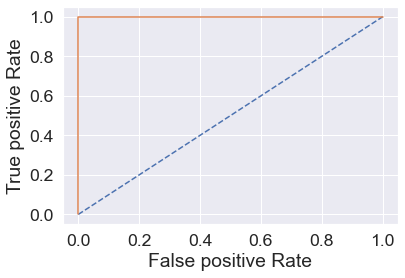

In [84]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# probs = KNN_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
KNN_train_auc=roc_auc_score(y_train, probs)
# KNN_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the Testing data

AUC: 0.885


Text(0, 0.5, 'True positive Rate')

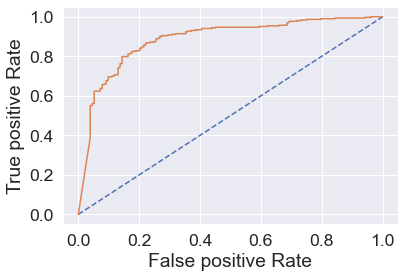

In [85]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [86]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = KNN_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = KNN_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

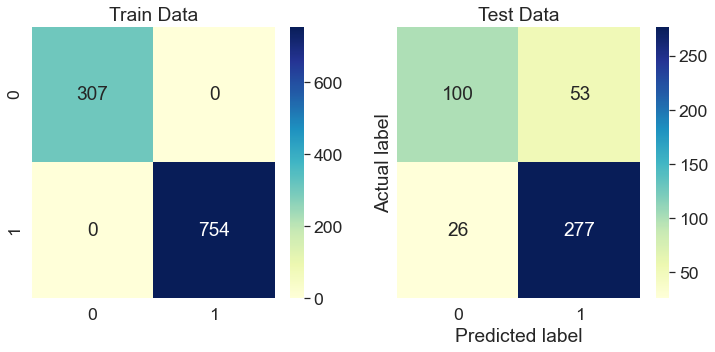

In [87]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [88]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456
 



In [89]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(KNN_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0588 ± 0.0244,Hague
0.0351 ± 0.0213,political.knowledge
0.0351 ± 0.0202,Blair
0.0320 ± 0.0071,Europe
0.0101 ± 0.0170,economic.cond.national
0.0066 ± 0.0190,age
0.0053 ± 0.0081,gender
0.0004 ± 0.0153,economic.cond.household


In [90]:
KNN_metrics=classification_report(y_train,pred_class_train,output_dict=True)
KNNdf=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1_h=round(KNNdf.loc["0"][2],2)
KNN_train_recall_h=round(KNNdf.loc["0"][1],2)
KNN_train_precision_h=round(KNNdf.loc["0"][0],2)
KNN_train_f1=round(KNNdf.loc["1"][2],2)
KNN_train_recall=round(KNNdf.loc["1"][1],2)
KNN_train_precision=round(KNNdf.loc["1"][0],2)
# print ('KNN_train_precision ',KNN_train_precision)
# print ('KNN_train_recall ',KNN_train_recall)
# print ('KNN_train_f1 ',KNN_train_f1)
KNN_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
KNNdf_test=pd.DataFrame(KNN_metrics_test).transpose()
KNN_test_precision_h=round(KNNdf_test.loc["0"][0],2)
KNN_test_recall_h=round(KNNdf_test.loc["0"][1],2)
KNN_test_f1_h=round(KNNdf_test.loc["0"][2],2)
KNN_test_precision=round(KNNdf_test.loc["1"][0],2)
KNN_test_recall=round(KNNdf_test.loc["1"][1],2)
KNN_test_f1=round(KNNdf_test.loc["1"][2],2)
# print ('KNN_test_precision ',KNN_test_precision)
# print ('KNN_test_recall ',KNN_test_recall)
# print ('KNN_test_f1 ',KNN_test_f1)
# KNN

# <font color='red'>Naive Bayes Model</font>

In [91]:
NB_model = GaussianNB()

Training

In [92]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [93]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [94]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [95]:
NB_model.fit(X_train, y_train)

GaussianNB()

Model tuning

In [ ]:
# not having much scope

Predicting on Training dataset & Testing Dataset

In [96]:
ytrain_predict = NB_model.predict(X_train)
# ytrain_predict = NB_model.predict(X_train_res)
ytest_predict = NB_model.predict(X_test)

Accuracy score for both training & testing dataset

In [97]:
NB_train_acc=NB_model.score(X_train, y_train)
# NB_train_acc=NB_model.score(X_train_res, y_train_res)
NB_test_acc=NB_model.score(X_test, y_test)

In [98]:
print(NB_train_acc*100)
print(NB_test_acc*100)

83.50612629594723
82.23684210526315


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 0.888


Text(0, 0.5, 'True positive Rate')

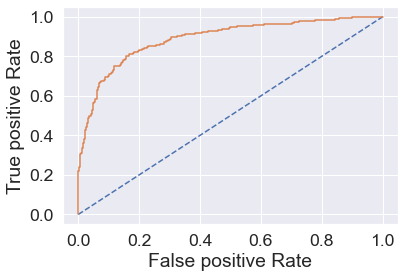

In [99]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# probs = NB_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
NB_train_auc=roc_auc_score(y_train, probs)
# NB_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the testing data

AUC: 0.876


Text(0, 0.5, 'True positive Rate')

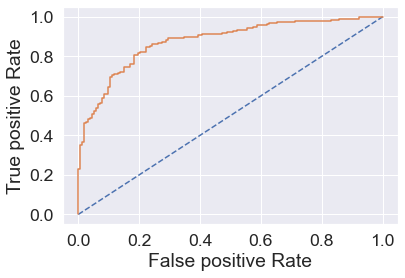

In [100]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [101]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = NB_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = NB_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

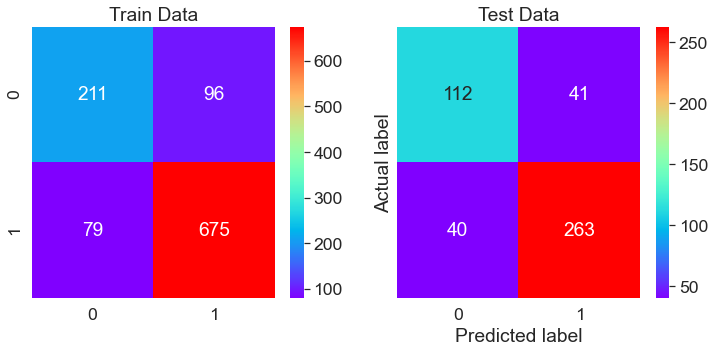

In [102]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [103]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



In [104]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(NB_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0697 ± 0.0210,Hague
0.0404 ± 0.0129,Europe
0.0395 ± 0.0190,Blair
0.0193 ± 0.0236,economic.cond.national
0.0184 ± 0.0059,political.knowledge
0.0066 ± 0.0073,age
-0.0026 ± 0.0058,gender
-0.0031 ± 0.0090,economic.cond.household


In [105]:
NB_metrics=classification_report(y_train,pred_class_train,output_dict=True)
NBdf=pd.DataFrame(NB_metrics).transpose()
NB_train_f1_h=round(NBdf.loc["0"][2],2)
NB_train_recall_h=round(NBdf.loc["0"][1],2)
NB_train_precision_h=round(NBdf.loc["0"][0],2)
NB_train_f1=round(NBdf.loc["1"][2],2)
NB_train_recall=round(NBdf.loc["1"][1],2)
NB_train_precision=round(NBdf.loc["1"][0],2)
# print ('NB_train_precision ',NB_train_precision)
# print ('NB_train_recall ',NB_train_recall)
# print ('NB_train_f1 ',NB_train_f1)
NB_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
NBdf_test=pd.DataFrame(NB_metrics_test).transpose()
NB_test_precision_h=round(NBdf_test.loc["0"][0],2)
NB_test_recall_h=round(NBdf_test.loc["0"][1],2)
NB_test_f1_h=round(NBdf_test.loc["0"][2],2)
NB_test_precision=round(NBdf_test.loc["1"][0],2)
NB_test_recall=round(NBdf_test.loc["1"][1],2)
NB_test_f1=round(NBdf_test.loc["1"][2],2)
# print ('NB_test_precision ',NB_test_precision)
# print ('NB_test_recall ',NB_test_recall)
# print ('NB_test_f1 ',NB_test_f1)
# NBdf

# <font color='red'>Bagging</font>

In [106]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [107]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [108]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
bgcl_model = BaggingClassifier(base_estimator=dTree,random_state=1)

In [109]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Training

In [ ]:
# bgcl_model = bgcl_model.fit(X_train, y_train)

Model tuning

In [110]:
param_grid = {
    'n_estimators': [50,100,150,200],
    'max_features' : [4,5,6,7]
}

grid_search = GridSearchCV(estimator = bgcl_model, param_grid = param_grid,scoring='f1', cv = 3)

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                         random_state=1),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

Best Parameters

In [112]:
grid_search.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=5, n_estimators=100, random_state=1)

In [113]:
bgcl_model=grid_search.best_estimator_

Predicting on Training dataset & Testing Dataset

In [114]:
ytrain_predict = bgcl_model.predict(X_train)
# ytrain_predict = bgcl_model.predict(X_train_res)
ytest_predict = bgcl_model.predict(X_test)

Accuracy score for both training & testing dataset

In [115]:
bgcl_train_acc=bgcl_model.score(X_train, y_train)
# bgcl_train_acc=bgcl_model.score(X_train_res, y_train_res)
bgcl_test_acc=bgcl_model.score(X_test, y_test)

In [116]:
print(bgcl_train_acc*100)
print(bgcl_test_acc*100)

99.3402450518379
81.7982456140351


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 1.000


Text(0, 0.5, 'True positive Rate')

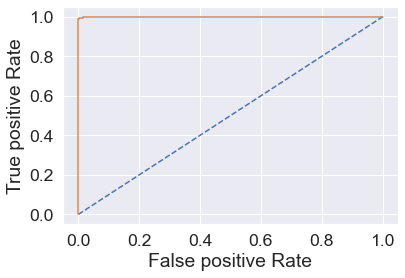

In [117]:
# predict probabilities
probs = bgcl_model.predict_proba(X_train)
# probs = bgcl_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
bgcl_train_auc=roc_auc_score(y_train, probs)
# bgcl_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the Testing data

AUC: 0.886


Text(0, 0.5, 'True positive Rate')

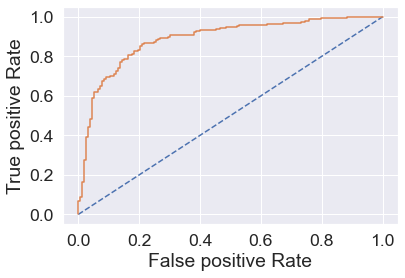

In [118]:
# predict probabilities
probs = bgcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
bgcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgcl_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [119]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = bgcl_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = bgcl_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

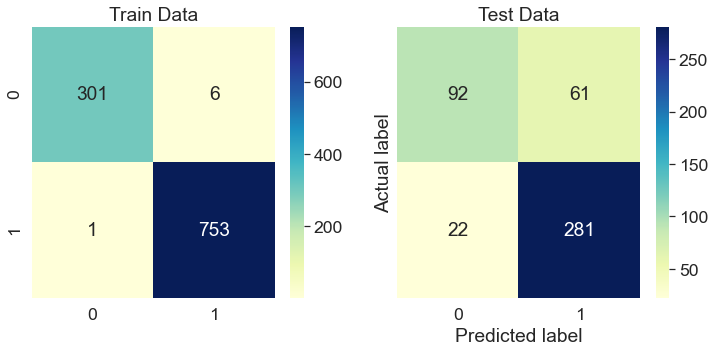

In [120]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [121]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99       307
           1       0.99      1.00      1.00       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.60      0.69       153
           1       0.82      0.93      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.76      0.78       456
weighted avg       0.82      0.82      0.81       456
 



In [122]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(bgcl_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0697 ± 0.0224,Hague
0.0636 ± 0.0403,Europe
0.0412 ± 0.0102,Blair
0.0329 ± 0.0188,political.knowledge
0.0184 ± 0.0129,age
0.0053 ± 0.0163,economic.cond.national
0.0026 ± 0.0102,economic.cond.household
-0.0013 ± 0.0081,gender


In [123]:
bgcl_metrics=classification_report(y_train,pred_class_train,output_dict=True)
bgdf=pd.DataFrame(bgcl_metrics).transpose()
bgcl_train_f1_h=round(bgdf.loc["0"][2],2)
bgcl_train_recall_h=round(bgdf.loc["0"][1],2)
bgcl_train_precision_h=round(bgdf.loc["0"][0],2)
bgcl_train_f1=round(bgdf.loc["1"][2],2)
bgcl_train_recall=round(bgdf.loc["1"][1],2)
bgcl_train_precision=round(bgdf.loc["1"][0],2)
# print ('bgcl_train_precision ',bgcl_train_precision)
# print ('bgcl_train_recall ',bgcl_train_recall)
# print ('bgcl_train_f1 ',bgcl_train_f1)
bgcl_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
bgdf_test=pd.DataFrame(bgcl_metrics_test).transpose()
bgcl_test_precision_h=round(bgdf_test.loc["0"][0],2)
bgcl_test_recall_h=round(bgdf_test.loc["0"][1],2)
bgcl_test_f1_h=round(bgdf_test.loc["0"][2],2)
bgcl_test_precision=round(bgdf_test.loc["1"][0],2)
bgcl_test_recall=round(bgdf_test.loc["1"][1],2)
bgcl_test_f1=round(bgdf_test.loc["1"][2],2)
# print ('bgcl_test_precision ',bgcl_test_precision)
# print ('bgcl_test_recall ',bgcl_test_recall)
# print ('bgcl_test_f1 ',bgcl_test_f1)

# <font color='red'>Random Forest</font>

In [124]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [125]:
RF_model=RandomForestClassifier(random_state=1)

Model Tuning

In [126]:
param_grid = {
    'n_estimators':[50,100,200],
    'max_features': [4,5,6,7]
}


grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid,scoring='f1', cv = 3)

In [127]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [128]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 100}

In [129]:
grid_search.best_estimator_

RandomForestClassifier(max_features=7, random_state=1)

In [130]:
RF_model=grid_search.best_estimator_

Predicting on Training dataset & Testing Dataset

In [131]:
ytrain_predict = RF_model.predict(X_train)
# ytrain_predict = RF_model.predict(X_train_res)
ytest_predict = RF_model.predict(X_test)

Accuracy score for both training & testing dataset

In [132]:
RF_train_acc=RF_model.score(X_train, y_train)
# RF_train_acc=RF_model.score(X_train_res, y_train_res)
RF_test_acc=RF_model.score(X_test, y_test)

In [133]:
print(RF_train_acc*100)
print(RF_test_acc*100)

100.0
82.01754385964912


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 1.000


Text(0, 0.5, 'True positive Rate')

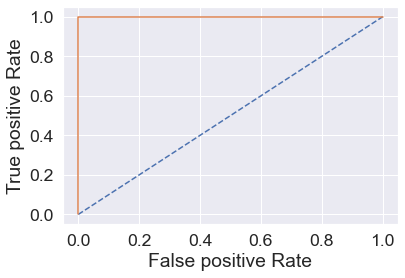

In [134]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# probs = RF_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
RF_train_auc=roc_auc_score(y_train, probs)
# RF_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Testing Data<br>
AUC and ROC for the Testing data

AUC: 0.881


Text(0, 0.5, 'True positive Rate')

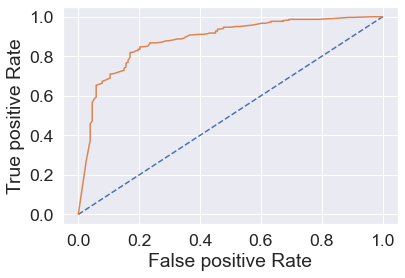

In [135]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [136]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = RF_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = RF_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

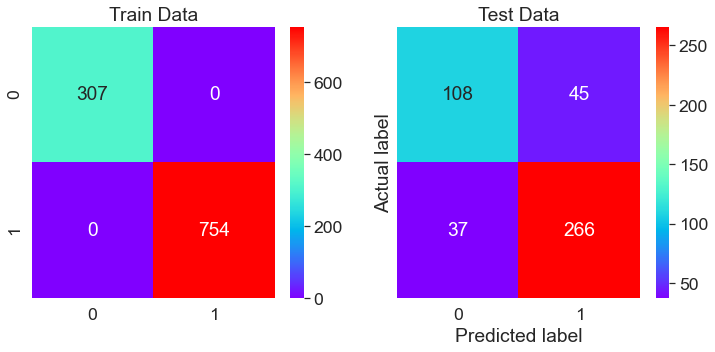

In [137]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [138]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



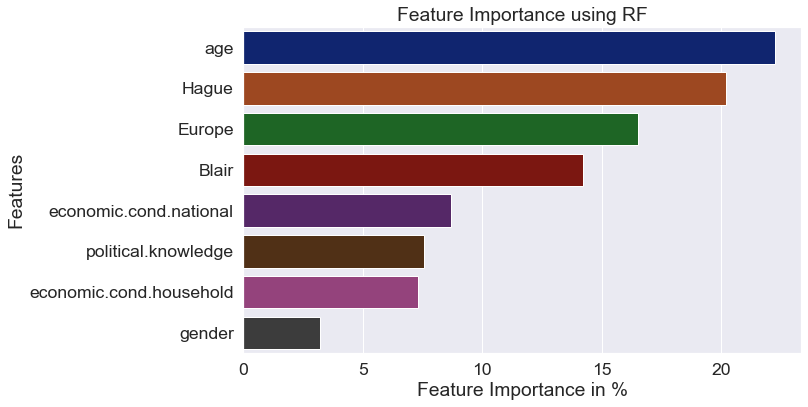

In [139]:
x=pd.DataFrame(RF_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [140]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(RF_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0754 ± 0.0081,Hague
0.0588 ± 0.0128,Europe
0.0351 ± 0.0154,political.knowledge
0.0307 ± 0.0200,Blair
0.0083 ± 0.0119,economic.cond.household
0.0075 ± 0.0168,economic.cond.national
0.0057 ± 0.0203,age
0.0009 ± 0.0053,gender


In [141]:
RF_metrics=classification_report(y_train,pred_class_train,output_dict=True)
RFdf=pd.DataFrame(RF_metrics).transpose()
RF_train_f1_h=round(RFdf.loc["0"][2],2)
RF_train_recall_h=round(RFdf.loc["0"][1],2)
RF_train_precision_h=round(RFdf.loc["0"][0],2)
RF_train_f1=round(RFdf.loc["1"][2],2)
RF_train_recall=round(RFdf.loc["1"][1],2)
RF_train_precision=round(RFdf.loc["1"][0],2)
# print ('RF_train_precision ',RF_train_precision)
# print ('RF_train_recall ',RF_train_recall)
# print ('RF_train_f1 ',RF_train_f1)
RF_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
RFdf_test=pd.DataFrame(RF_metrics_test).transpose()
RF_test_precision_h=round(RFdf_test.loc["0"][0],2)
RF_test_recall_h=round(RFdf_test.loc["0"][1],2)
RF_test_f1_h=round(RFdf_test.loc["0"][2],2)
RF_test_precision=round(RFdf_test.loc["1"][0],2)
RF_test_recall=round(RFdf_test.loc["1"][1],2)
RF_test_f1=round(RFdf_test.loc["1"][2],2)
# print ('RF_test_precision ',RF_test_precision)
# print ('RF_test_recall ',RF_test_recall)
# print ('RF_test_f1 ',RF_test_f1)

# <font color='red'>Ada Boosting</font>

In [142]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [143]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [144]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)

Training

In [145]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

Model tuning

In [ ]:
# not having much scope

Predicting on Training dataset & Testing Dataset

In [146]:
ytrain_predict = ADB_model.predict(X_train)
# ytrain_predict = ADB_model.predict(X_train_res)
ytest_predict = ADB_model.predict(X_test)

Accuracy score for both training & testing dataset

In [147]:
ADB_train_acc=ADB_model.score(X_train, y_train)
# ADB_train_acc=ADB_model.score(X_train_res, y_train_res)
ADB_test_acc=ADB_model.score(X_test, y_test)

In [148]:
print(ADB_train_acc*100)
print(ADB_test_acc*100)

85.01413760603205
81.35964912280701


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 0.915


Text(0, 0.5, 'True positive Rate')

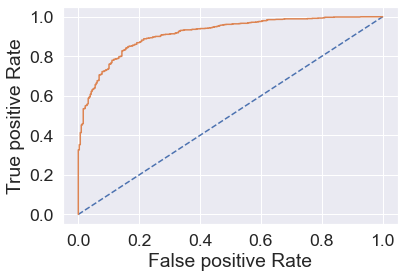

In [149]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# probs = ADB_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
ADB_train_auc=roc_auc_score(y_train, probs)
# ADB_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the test data

AUC: 0.877


Text(0, 0.5, 'True positive Rate')

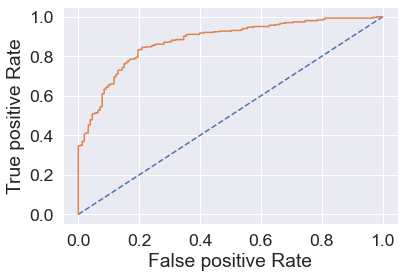

In [150]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [151]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ADB_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ADB_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

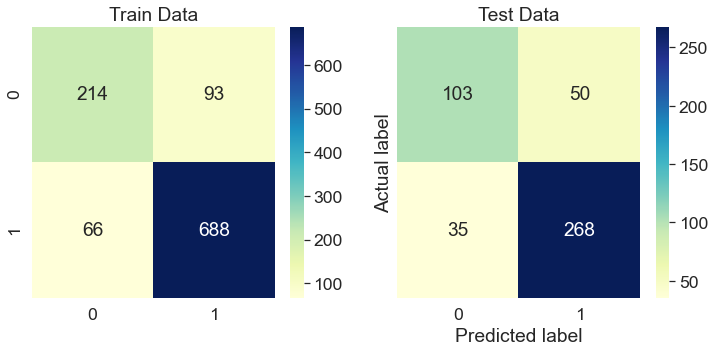

In [152]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [153]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



In [154]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(ADB_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0794 ± 0.0290,Hague
0.0605 ± 0.0199,Blair
0.0281 ± 0.0094,Europe
0.0202 ± 0.0128,economic.cond.national
0.0145 ± 0.0140,age
0.0096 ± 0.0076,political.knowledge
0 ± 0.0000,gender
-0.0022 ± 0.0139,economic.cond.household


In [155]:
ADB_metrics=classification_report(y_train,pred_class_train,output_dict=True)
adbdf=pd.DataFrame(ADB_metrics).transpose()
ADB_train_f1_h=round(adbdf.loc["0"][2],2)
ADB_train_recall_h=round(adbdf.loc["0"][1],2)
ADB_train_precision_h=round(adbdf.loc["0"][0],2)
ADB_train_f1=round(adbdf.loc["1"][2],2)
ADB_train_recall=round(adbdf.loc["1"][1],2)
ADB_train_precision=round(adbdf.loc["1"][0],2)
# print ('ADB_train_precision ',ADB_train_precision)
# print ('ADB_train_recall ',ADB_train_recall)
# print ('ADB_train_f1 ',ADB_train_f1)
ADB_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
adbdf_test=pd.DataFrame(ADB_metrics_test).transpose()
ADB_test_precision_h=round(adbdf_test.loc["0"][0],2)
ADB_test_recall_h=round(adbdf_test.loc["0"][1],2)
ADB_test_f1_h=round(adbdf_test.loc["0"][2],2)
ADB_test_precision=round(adbdf_test.loc["1"][0],2)
ADB_test_recall=round(adbdf_test.loc["1"][1],2)
ADB_test_f1=round(adbdf_test.loc["1"][2],2)
# print ('ADB_test_precision ',ADB_test_precision)
# print ('ADB_test_recall ',ADB_test_recall)
# print ('ADB_test_f1 ',ADB_test_f1)
# adbdf

# <font color='red'>Gradient Boosting</font>

In [156]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [157]:
gb_model = GradientBoostingClassifier(random_state=1)

Training

In [ ]:
# gb_model = gb_model.fit(X_train, y_train)

Model tuning

In [158]:
param_grid = {
#     'criterion' : ['friedman_mse', 'mse', 'mae'],
    'n_estimators': [50,100,150],
    'max_features': [5,6,7],
    'tol':[0.0001,0.001]    
}

grid_search = GridSearchCV(estimator = gb_model, param_grid = param_grid,scoring='f1', cv = 3)

In [159]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_features': [5, 6, 7],
                         'n_estimators': [50, 100, 150],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

Best Parameters

In [160]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 100, 'tol': 0.0001}

In [161]:
grid_search.best_estimator_

GradientBoostingClassifier(max_features=5, random_state=1)

In [162]:
gb_model=grid_search.best_estimator_

Predicting on Training dataset & Testing Dataset

In [163]:
ytrain_predict = gb_model.predict(X_train)
# ytrain_predict = gb_model.predict(X_train_res)
ytest_predict = gb_model.predict(X_test)

Accuracy score for both training & testing dataset

In [164]:
gb_train_acc=gb_model.score(X_train, y_train)
# gb_train_acc=gb_model.score(X_train_res, y_train_res)
gb_test_acc=gb_model.score(X_test, y_test)

In [165]:
print(gb_train_acc*100)
print(gb_test_acc*100)

89.16116870876532
83.55263157894737


Model Performance for Training Data<br>
AUC and ROC for the training data

AUC: 0.948


Text(0, 0.5, 'True positive Rate')

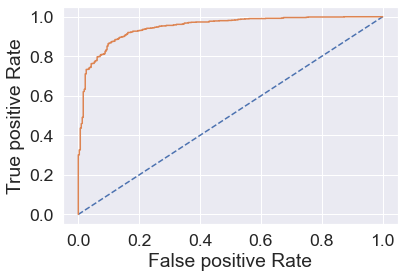

In [166]:
# predict probabilities
probs = gb_model.predict_proba(X_train)
# probs = gb_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
gb_train_auc=roc_auc_score(y_train, probs)
# gb_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Model Performance for Test Data<br>
AUC and ROC for the testing data

AUC: 0.904


Text(0, 0.5, 'True positive Rate')

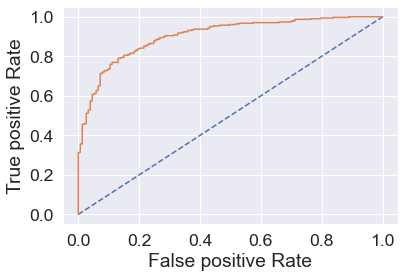

In [167]:
# predict probabilities
probs = gb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Confusion Matrix for the training data and testing data

In [168]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = gb_model.predict(X_train)
# pred_class_train = model.predict(X_train_res)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gb_model.predict(X_test)

Text(0.5, 16.5, 'Predicted label')

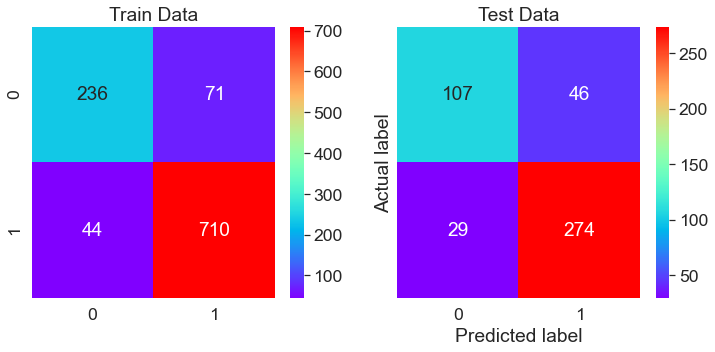

In [169]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize=(12,5))
# f,ax=plt.subplots(1,2,figsize=(15,7))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=1.6)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
# plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,pred_class_train)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Train Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Training Data and Test Data Classification Report Comparison

In [170]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.77      0.80       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.86      1061
weighted avg       0.89      0.89      0.89      1061
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.79      0.70      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 



In [171]:
# create permutation importance object using model and fit on test set
perm = PermutationImportance(gb_model).fit(X_test, y_test)
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = list(X.columns))

Weight,Feature
0.0873 ± 0.0089,Hague
0.0513 ± 0.0138,Blair
0.0504 ± 0.0230,Europe
0.0430 ± 0.0035,political.knowledge
0.0171 ± 0.0178,age
0.0079 ± 0.0252,economic.cond.national
0.0009 ± 0.0120,economic.cond.household
0 ± 0.0000,gender


In [172]:
gb_metrics=classification_report(y_train,pred_class_train,output_dict=True)
gbdf=pd.DataFrame(gb_metrics).transpose()
gb_train_f1_h=round(gbdf.loc["0"][2],2)
gb_train_recall_h=round(gbdf.loc["0"][1],2)
gb_train_precision_h=round(gbdf.loc["0"][0],2)
gb_train_f1=round(gbdf.loc["1"][2],2)
gb_train_recall=round(gbdf.loc["1"][1],2)
gb_train_precision=round(gbdf.loc["1"][0],2)
# print ('gb_train_precision ',gb_train_precision)
# print ('gb_train_recall ',gb_train_recall)
# print ('gb_train_f1 ',gb_train_f1)
gb_metrics_test=classification_report(y_test,pred_class_test,output_dict=True)
gbdf_test=pd.DataFrame(gb_metrics_test).transpose()
gb_test_precision_h=round(gbdf_test.loc["0"][0],2)
gb_test_recall_h=round(gbdf_test.loc["0"][1],2)
gb_test_f1_h=round(gbdf_test.loc["0"][2],2)
gb_test_precision=round(gbdf_test.loc["1"][0],2)
gb_test_recall=round(gbdf_test.loc["1"][1],2)
gb_test_f1=round(gbdf_test.loc["1"][2],2)
# print ('gb_test_precision ',gb_test_precision)
# print ('gb_test_recall ',gb_test_recall)
# print ('gb_test_f1 ',gb_test_f1)
# gbdf

# <font color='red'>Final Conclusion</font>

Area under the curve for Logistic Regression Classification Model is 0.891930369507539
Area under the curve for LDA Classification Model is 0.8943031558057766
Area under the curve for KNN Calssification Model is 0.7334282447852628
Area under the curve for Naive Bayes Classification Model is 0.8763562630772882
Area under the curve for Bagging Classification Model is 0.8863219655298864
Area under the curve for Random Forest Classification Model is 0.8814901097952933
Area under the curve for Ada Boosting Classification Model is 0.8773808753424363
Area under the curve for Gradient Boosting Classification Model is 0.9037619448219331


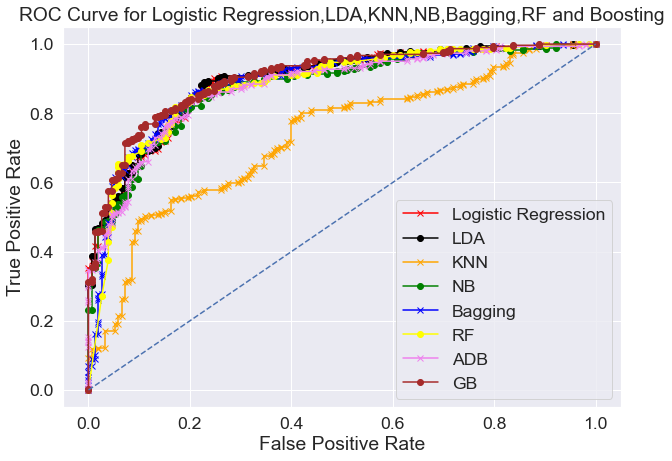

In [173]:
models_names={log_model:'Logistic Regression',lda_model:'LDA',KNN_model:'KNN',NB_model:'NB',bgcl_model:'Bagging',RF_model:'RF',
              ADB_model:'ADB',gb_model:'GB'}

print('Area under the curve for Logistic Regression Classification Model is',roc_auc_score(y_test,log_model.predict_proba(X_test)[:,1]))
print('Area under the curve for LDA Classification Model is',roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))
print('Area under the curve for KNN Calssification Model is',roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Naive Bayes Classification Model is',roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Bagging Classification Model is',roc_auc_score(y_test,bgcl_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Ada Boosting Classification Model is',roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Gradient Boosting Classification Model is',roc_auc_score(y_test,gb_model.predict_proba(X_test)[:,1]))

plt.figure(figsize=(10,7))

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='red') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='black') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='orange') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='green') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,bgcl_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='blue') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='yellow') 

fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,ADB_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='x',color='violet') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,gb_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='brown') 

# fpr_ann, tpr_ann, thresholds = roc_curve(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
# plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression,LDA,KNN,NB,Bagging,RF and Boosting'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

In [ ]:
# index=['Accuracy', 'AUC Score', 'Recall','Precision','F1 Score']
# data = pd.DataFrame({'Logistic Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
#         'Logistic Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
#         'Logistic Test with Threshold 0.4':[log_threshold_test_acc_threshold,log_threshold_test_auc_threshold,log_threshold_test_recall_threshold,log_threshold_test_precision_threshold,log_threshold_test_f1_threshold],
#        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
#         'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
#         'LDA Test with Threshold 0.4':[lda_threshold_test_acc_threshold,lda_threshold_test_auc_threshold,lda_threshold_test_recall_threshold,lda_threshold_test_precision_threshold,lda_threshold_test_f1_threshold]},index=index)
# round(data,2)



In [ ]:
# index=['Accuracy', 'AUC Score', 'Recall','Precision','F1 Score']
# data = pd.DataFrame({'Logistic Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
#         'Logistic Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
#        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
#         'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
#        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
#         'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
#        'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
#         'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
#        'bgcl Train':[bgcl_train_acc,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
#         'bgcl Test':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
#        'RF Train':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
#         'RF Test':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
#        'ADB Train':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
#         'ADB Test':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
#        'gb Train':[gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1],
#         'gb Test':[gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1]},index=index)
# round(data,2)

In [ ]:
# !pip install dataframe_image

In [178]:
import dataframe_image as dfi
pd.set_option('display.max_columns', None)

In [175]:
index=['Accuracy', 'AUC Score', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'Logistic Train Blair':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
#        'Logistic Train Hague':[log_train_acc,log_train_auc,log_train_recall_h,log_train_precision_h,log_train_f1_h],
       'Logistic Test Blair':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
#        'Logistic Test Hague':[log_test_acc,log_test_auc,log_test_recall_h,log_test_precision_h,log_test_f1_h],
       'LDA Train Blair':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
#        'LDA Train Hague':[lda_train_acc,lda_train_auc,lda_train_recall_h,lda_train_precision_h,lda_train_f1_h],
        'LDA Test Blair':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
#         'LDA Test Hague':[lda_test_acc,lda_test_auc,lda_test_recall_h,lda_test_precision_h,lda_test_f1_h],
       'KNN Train Blair':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
#        'KNN Train Hague':[KNN_train_acc,KNN_train_auc,KNN_train_recall_h,KNN_train_precision_h,KNN_train_f1_h],
        'KNN Test Blair':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
#         'KNN Test Hague':[KNN_test_acc,KNN_test_auc,KNN_test_recall_h,KNN_test_precision_h,KNN_test_f1_h],
       'NB Train Blair':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
#        'NB Train Hague':[NB_train_acc,NB_train_auc,NB_train_recall_h,NB_train_precision_h,NB_train_f1_h],
        'NB Test Blair':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
#         'NB Test Hague':[NB_test_acc,NB_test_auc,NB_test_recall_h,NB_test_precision_h,NB_test_f1_h],
       'bgcl Train Blair':[bgcl_train_acc,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
#        'bgcl Train Hague':[bgcl_train_acc,bgcl_train_auc,bgcl_train_recall_h,bgcl_train_precision_h,bgcl_train_f1_h],
        'bgcl Test Blair':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
#         'bgcl Test Hague':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall_h,bgcl_test_precision_h,bgcl_test_f1_h],
       'RF Train Blair':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
#        'RF Train Hague':[RF_train_acc,RF_train_auc,RF_train_recall_h,RF_train_precision_h,RF_train_f1_h],
        'RF Test Blair':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
#         'RF Test Hague':[RF_test_acc,RF_test_auc,RF_test_recall_h,RF_test_precision_h,RF_test_f1_h],
       'ADB Train Blair':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
#        'ADB Train Hague':[ADB_train_acc,ADB_train_auc,ADB_train_recall_h,ADB_train_precision_h,ADB_train_f1_h],
        'ADB Test Blair':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
#         'ADB Test Hague':[ADB_test_acc,ADB_test_auc,ADB_test_recall_h,ADB_test_precision_h,ADB_test_f1_h],
       'gb Train Blair':[gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1],
#        'gb Train Hague':[gb_train_acc,gb_train_auc,gb_train_recall_h,gb_train_precision_h,gb_train_f1_h],
        'gb Test Blair':[gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1],
#         'gb Test Hague':[gb_test_acc,gb_test_auc,gb_test_recall_h,gb_test_precision_h,gb_test_f1_h]
},index=index)
round(data,2)

,Logistic Train Blair,Logistic Test Blair,LDA Train Blair,LDA Test Blair,KNN Train Blair,KNN Test Blair,NB Train Blair,NB Test Blair,bgcl Train Blair,bgcl Test Blair,RF Train Blair,RF Test Blair,ADB Train Blair,ADB Test Blair,gb Train Blair,gb Test Blair
Accuracy,0.83,0.86,0.82,0.85,1.0,0.83,0.84,0.82,0.99,0.82,1.0,0.82,0.85,0.81,0.89,0.84
AUC Score,0.88,0.91,0.88,0.91,1.0,0.88,0.89,0.88,1.00,0.89,1.0,0.88,0.91,0.88,0.95,0.90
Recall,0.90,0.93,0.89,0.92,1.0,0.91,0.90,0.87,1.00,0.93,1.0,0.88,0.91,0.88,0.94,0.90
Precision,0.86,0.87,0.86,0.87,1.0,0.84,0.88,0.87,0.99,0.82,1.0,0.86,0.88,0.84,0.91,0.86
F1 Score,0.88,0.90,0.87,0.90,1.0,0.88,0.89,0.87,1.00,0.87,1.0,0.87,0.90,0.86,0.93,0.88


In [176]:
index=['Accuracy', 'AUC Score', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
#         'Logistic Train Blair':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
       'Logistic Train Hague':[log_train_acc,log_train_auc,log_train_recall_h,log_train_precision_h,log_train_f1_h],
#        'Logistic Test Blair':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Logistic Test Hague':[log_test_acc,log_test_auc,log_test_recall_h,log_test_precision_h,log_test_f1_h],
#        'LDA Train Blair':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
       'LDA Train Hague':[lda_train_acc,lda_train_auc,lda_train_recall_h,lda_train_precision_h,lda_train_f1_h],
#         'LDA Test Blair':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Test Hague':[lda_test_acc,lda_test_auc,lda_test_recall_h,lda_test_precision_h,lda_test_f1_h],
#        'KNN Train Blair':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
       'KNN Train Hague':[KNN_train_acc,KNN_train_auc,KNN_train_recall_h,KNN_train_precision_h,KNN_train_f1_h],
#         'KNN Test Blair':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'KNN Test Hague':[KNN_test_acc,KNN_test_auc,KNN_test_recall_h,KNN_test_precision_h,KNN_test_f1_h],
#        'NB Train Blair':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
       'NB Train Hague':[NB_train_acc,NB_train_auc,NB_train_recall_h,NB_train_precision_h,NB_train_f1_h],
#         'NB Test Blair':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'NB Test Hague':[NB_test_acc,NB_test_auc,NB_test_recall_h,NB_test_precision_h,NB_test_f1_h],
#        'bgcl Train Blair':[bgcl_train_acc,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
       'bgcl Train Hague':[bgcl_train_acc,bgcl_train_auc,bgcl_train_recall_h,bgcl_train_precision_h,bgcl_train_f1_h],
#         'bgcl Test Blair':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'bgcl Test Hague':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall_h,bgcl_test_precision_h,bgcl_test_f1_h],
#        'RF Train Blair':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
       'RF Train Hague':[RF_train_acc,RF_train_auc,RF_train_recall_h,RF_train_precision_h,RF_train_f1_h],
#         'RF Test Blair':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
        'RF Test Hague':[RF_test_acc,RF_test_auc,RF_test_recall_h,RF_test_precision_h,RF_test_f1_h],
#        'ADB Train Blair':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
       'ADB Train Hague':[ADB_train_acc,ADB_train_auc,ADB_train_recall_h,ADB_train_precision_h,ADB_train_f1_h],
#         'ADB Test Blair':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
        'ADB Test Hague':[ADB_test_acc,ADB_test_auc,ADB_test_recall_h,ADB_test_precision_h,ADB_test_f1_h],
#        'gb Train Blair':[gb_train_acc,gb_train_auc,gb_train_recall,gb_train_precision,gb_train_f1],
       'gb Train Hague':[gb_train_acc,gb_train_auc,gb_train_recall_h,gb_train_precision_h,gb_train_f1_h],
#         'gb Test Blair':[gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1],
        'gb Test Hague':[gb_test_acc,gb_test_auc,gb_test_recall_h,gb_test_precision_h,gb_test_f1_h]},index=index)
round(data,2)

,Logistic Train Hague,Logistic Test Hague,LDA Train Hague,LDA Test Hague,KNN Train Hague,KNN Test Hague,NB Train Hague,NB Test Hague,bgcl Train Hague,bgcl Test Hague,RF Train Hague,RF Test Hague,ADB Train Hague,ADB Test Hague,gb Train Hague,gb Test Hague
Accuracy,0.83,0.86,0.82,0.85,1.0,0.83,0.84,0.82,0.99,0.82,1.0,0.82,0.85,0.81,0.89,0.84
AUC Score,0.88,0.91,0.88,0.91,1.0,0.88,0.89,0.88,1.00,0.89,1.0,0.88,0.91,0.88,0.95,0.90
Recall,0.66,0.68,0.67,0.69,1.0,0.65,0.69,0.73,0.98,0.60,1.0,0.71,0.70,0.67,0.77,0.70
Precision,0.75,0.82,0.72,0.80,1.0,0.79,0.73,0.74,1.00,0.81,1.0,0.74,0.76,0.75,0.84,0.79
F1 Score,0.70,0.74,0.70,0.74,1.0,0.72,0.71,0.73,0.99,0.69,1.0,0.72,0.73,0.71,0.80,0.74


In [179]:
dfi.export(data,"mytable_withsmote.png",max_cols=-1)

In [180]:
data.to_csv('output_withsmote.csv')

In [181]:
index=['Accuracy', 'AUC Score', 'Recall','Precision','F1 Score']
data1 = pd.DataFrame({'Logistic Test Blair':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
       'Logistic Test Hague':['-','-',log_test_recall_h,log_test_precision_h,log_test_f1_h],
        'LDA Test Blair':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Test Hague':['-','-',lda_test_recall_h,lda_test_precision_h,lda_test_f1_h],
        'KNN Test Blair':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'KNN Test Hague':['-','-',KNN_test_recall_h,KNN_test_precision_h,KNN_test_f1_h],
        'NB Test Blair':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'NB Test Hague':['-','-',NB_test_recall_h,NB_test_precision_h,NB_test_f1_h],
        'bgcl Test Blair':[bgcl_test_acc,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'bgcl Test Hague':['-','-',bgcl_test_recall_h,bgcl_test_precision_h,bgcl_test_f1_h],
        'RF Test Blair':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
        'RF Test Hague':['-','-',RF_test_recall_h,RF_test_precision_h,RF_test_f1_h],
        'ADB Test Blair':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
        'ADB Test Hague':['-','-',ADB_test_recall_h,ADB_test_precision_h,ADB_test_f1_h],
        'gb Test Blair':[gb_test_acc,gb_test_auc,gb_test_recall,gb_test_precision,gb_test_f1],
        'gb Test Hague':['-','-',gb_test_recall_h,gb_test_precision_h,gb_test_f1_h]},index=index)
round(data1,2)

,Logistic Test Blair,Logistic Test Hague,LDA Test Blair,LDA Test Hague,KNN Test Blair,KNN Test Hague,NB Test Blair,NB Test Hague,bgcl Test Blair,bgcl Test Hague,RF Test Blair,RF Test Hague,ADB Test Blair,ADB Test Hague,gb Test Blair,gb Test Hague
Accuracy,0.86,-,0.85,-,0.83,-,0.82,-,0.82,-,0.82,-,0.81,-,0.84,-
AUC Score,0.91,-,0.91,-,0.88,-,0.88,-,0.89,-,0.88,-,0.88,-,0.90,-
Recall,0.93,0.68,0.92,0.69,0.91,0.65,0.87,0.73,0.93,0.6,0.88,0.71,0.88,0.67,0.90,0.7
Precision,0.87,0.82,0.87,0.8,0.84,0.79,0.87,0.74,0.82,0.81,0.86,0.74,0.84,0.75,0.86,0.79
F1 Score,0.90,0.74,0.90,0.74,0.88,0.72,0.87,0.73,0.87,0.69,0.87,0.72,0.86,0.71,0.88,0.74


# <font color='blue'>Problem 2</font>

In [182]:
import nltk
import json
import string
import matplotlib.pyplot as plt
import numpy as np
# nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
# inaugural.fileids()
# inaugural.raw('1941-Roosevelt.txt')
# inaugural.raw('1961-Kennedy.txt')
# inaugural.raw('1973-Nixon.txt')

**2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)**

In [ ]:
# inaugural.raw('1941-Roosevelt.txt')

In [183]:
R_chars = nltk.corpus.inaugural.raw('1941-Roosevelt.txt')
# print(len(R_chars))
R_words = nltk.corpus.inaugural.words('1941-Roosevelt.txt')
# print(len(R_words))
R_sent = nltk.corpus.inaugural.sents('1941-Roosevelt.txt')
# print(len(R_sent))
print("Number of characters present in 1941-Roosevelt's speech:",len(R_chars))
print("Number of words present in 1941-Roosevelt's speech:",len(R_words))
print("Number of sentences present in 1941-Roosevelt's speech:",len(R_sent))
print('**************')
K_chars = nltk.corpus.inaugural.raw('1961-Kennedy.txt')
K_words = nltk.corpus.inaugural.words('1961-Kennedy.txt')
K_sent = nltk.corpus.inaugural.sents('1961-Kennedy.txt')
# print(len(R_sent))
print("Number of characters present in 1961-Kennedy's speech:",len(K_chars))
print("Number of words present in 1961-Kennedy's speech:",len(K_words))
print("Number of sentences present in 1961-Kennedy's speech:",len(K_sent))
print('**************')
N_chars = nltk.corpus.inaugural.raw('1973-Nixon.txt')
# print(len(R_chars))
N_words = nltk.corpus.inaugural.words('1973-Nixon.txt')
# print(len(R_words))
N_sent = nltk.corpus.inaugural.sents('1973-Nixon.txt')
# print(len(R_sent))
print("Number of characters present in 1973-Nixon's speech:",len(N_chars))
print("Number of words present in 1973-Nixon's speech:",len(N_words))
print("Number of sentences present in 1973-Nixon's speech:",len(N_sent))

Number of characters present in 1941-Roosevelt's speech: 7571
Number of words present in 1941-Roosevelt's speech: 1536
Number of sentences present in 1941-Roosevelt's speech: 68
**************
Number of characters present in 1961-Kennedy's speech: 7618
Number of words present in 1961-Kennedy's speech: 1546
Number of sentences present in 1961-Kennedy's speech: 52
**************
Number of characters present in 1973-Nixon's speech: 9991
Number of words present in 1973-Nixon's speech: 2028
Number of sentences present in 1973-Nixon's speech: 69


In [184]:
# inaugural.fileids()
print("Total number of characters from all 3 speeches:",len(R_chars)+len(K_chars)+len(N_chars))
print("Total number of words from all 3 speeches:",len(R_words)+len(K_words)+len(N_words))
print("Total number of sentences from all 3 speeches:",len(R_sent)+len(K_sent)+len(N_sent))

Total number of characters from all 3 speeches: 25180
Total number of words from all 3 speeches: 5110
Total number of sentences from all 3 speeches: 189


**2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.**

In [ ]:
# nltk.download('wordnet')

In [185]:
# porter=PorterStemmer()
# stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [186]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)
    sw_list = ["--","`","``","'s","''"]
    my_stop_words = ['u','mr.','mrs.']
    stopwords.extend(sw_list)
    text_tokens = word_tokenize(text)
    text_tokens_text = " ".join(text_tokens)
    stem_sentence=[lemmatizer.lemmatize(word,pos="v") for word in text_tokens]
    tokens_without_sw = [w for w in stem_sentence if not w.lower() in stopwords]
    tokens_without_sw1 = [w.lower() for w in tokens_without_sw if not w.lower() in my_stop_words]
    new_text = " ".join(tokens_without_sw1)
    return len(text_tokens_text.split()),len(new_text.split()),new_text

In [187]:
print("1941-Roosevelt's speech")
print("-------------------")
content_fraction(inaugural.raw('1941-Roosevelt.txt'))

1941-Roosevelt's speech
-------------------


(1526,
 625,
 'national day inauguration since 1789 people renew sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happen pause moment take stock recall place history rediscover may risk real peril inaction lives nations determine count years lifetime human spirit life man three-score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limit measure kind mystical artificial fate unexplained reason tyranny slavery become surge wave future freedom ebb tide americans know true eight years ago life republic seem freeze fatalistic terror prove true midst shock act act quickly boldly decisively later years live years fruitful years people democracy bring us greater security hope better understand life ideals measure material things vital present f

In [188]:
print("1961-Kennedy's speech")
print("-------------------")
content_fraction(inaugural.raw('1961-Kennedy.txt'))

1961-Kennedy's speech
-------------------


(1543,
 688,
 'vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolize end well begin signify renewal well change swear almighty god solemn oath forebears l prescribe nearly century three quarter ago world different man hold mortal hand power abolish form human poverty form human life yet revolutionary beliefs forebears fight still issue around globe belief right man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch pass new generation americans bear century temper war discipline hard bitter peace proud ancient heritage unwilling witness permit slow undo human right nation always commit commit today home around world let every nation know whether wish us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much pledg

In [189]:
print("1973-Nixon's speech")
print("-------------------")
content_fraction(inaugural.raw('1973-Nixon.txt'))

1973-Nixon's speech
-------------------


(2006,
 828,
 'vice president speaker chief justice senator cook eisenhower fellow citizens great good country share together meet four years ago america bleak spirit depress prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation lead stagnation home invite new danger abroad let us resolve become time great responsibilities greatly bear renew spirit promise america enter third century nation past year saw far-reaching result new policies peace continue revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remember year greatest progress since end world war ii toward last peace world peace seek world flimsy peace merely interlude war peace endure generations come important understand necessity limitations america rol

**2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)**

In [190]:
def top3words(text):
    stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)
    sw_list = ["--","`","``","'s","''"]
    my_stop_words = ['u','mr.','mrs.']
    stopwords.extend(sw_list)
    text_tokens = word_tokenize(text)
    text_tokens_text = " ".join(text_tokens)
    stem_sentence=[lemmatizer.lemmatize(word,pos="v") for word in text_tokens]
    tokens_without_sw = [w.lower() for w in stem_sentence if not w.lower() in stopwords]
    tokens_without_sw1 = [w.lower() for w in tokens_without_sw if not w.lower() in my_stop_words]
    all_words_freq = nltk.FreqDist(tokens_without_sw1)
    word_features = [item[0] for item in all_words_freq.most_common(3)]
    return word_features[0:3]    

In [191]:
print("Top 3 words from 1941-Roosevelt's speech")
print("-------------------")
top3words(nltk.corpus.inaugural.raw('1941-Roosevelt.txt'))

Top 3 words from 1941-Roosevelt's speech
-------------------


['nation', 'know', 'people']

In [192]:
print("Top 3 words from 1961-Kennedy's speech")
print("-------------------")
top3words(nltk.corpus.inaugural.raw('1961-Kennedy.txt'))

Top 3 words from 1961-Kennedy's speech
-------------------


['let', 'us', 'world']

In [193]:
print("Top 3 words from 1973-Nixon's speech")
print("-------------------")
top3words(nltk.corpus.inaugural.raw('1973-Nixon.txt'))

Top 3 words from 1973-Nixon's speech
-------------------


['us', 'let', 'america']

**2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)**

In [194]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)
sw_list = ["--","`","``","'s","''","..."]
my_stop_words = ['u','mr.','mrs.']
stopwords.extend(sw_list)

In [195]:
text_tokens = word_tokenize(nltk.corpus.inaugural.raw('1941-Roosevelt.txt'))
text_tokens_text = " ".join(text_tokens)
stem_sentence=[lemmatizer.lemmatize(word,pos="v") for word in text_tokens]
tokens_without_sw = [w.lower() for w in stem_sentence if not w.lower() in stopwords]
tokens_without_sw1 = [w.lower() for w in tokens_without_sw if not w.lower() in my_stop_words]
new_text = " ".join(tokens_without_sw1)
print("After stopwords and lemmatization from 1941-Roosevelt's speech")
print("-------------------")
new_text

After stopwords and lemmatization from 1941-Roosevelt's speech
-------------------


'national day inauguration since 1789 people renew sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happen pause moment take stock recall place history rediscover may risk real peril inaction lives nations determine count years lifetime human spirit life man three-score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limit measure kind mystical artificial fate unexplained reason tyranny slavery become surge wave future freedom ebb tide americans know true eight years ago life republic seem freeze fatalistic terror prove true midst shock act act quickly boldly decisively later years live years fruitful years people democracy bring us greater security hope better understand life ideals measure material things vital present future experien

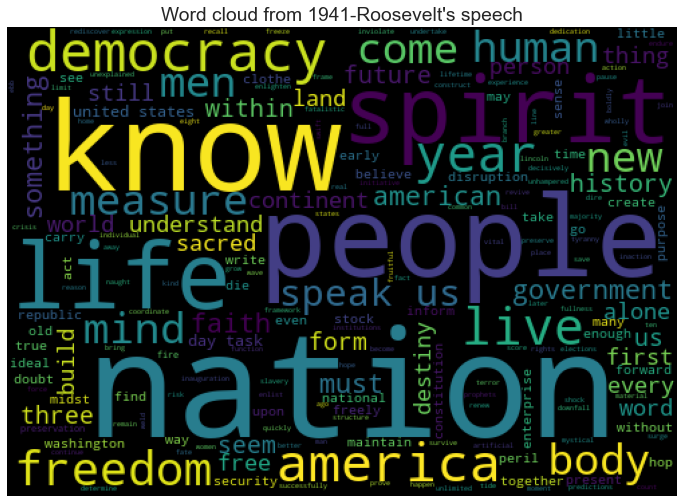

In [196]:
wordcloud = WordCloud(width=500, height=350,random_state=21, max_font_size=110).generate(new_text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word cloud from 1941-Roosevelt's speech")
plt.show()

In [197]:
text_tokens = word_tokenize(nltk.corpus.inaugural.raw('1961-Kennedy.txt'))
text_tokens_text = " ".join(text_tokens)
stem_sentence=[lemmatizer.lemmatize(word,pos="v") for word in text_tokens]
tokens_without_sw = [w.lower() for w in stem_sentence if not w.lower() in stopwords]
tokens_without_sw1 = [w.lower() for w in tokens_without_sw if not w.lower() in my_stop_words]
new_text1 = " ".join(tokens_without_sw1)
print("After stopwords and lemmatization from 1961-Kennedy's speech")
print("-------------------")
new_text1

After stopwords and lemmatization from 1961-Kennedy's speech
-------------------


'vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolize end well begin signify renewal well change swear almighty god solemn oath forebears l prescribe nearly century three quarter ago world different man hold mortal hand power abolish form human poverty form human life yet revolutionary beliefs forebears fight still issue around globe belief right man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch pass new generation americans bear century temper war discipline hard bitter peace proud ancient heritage unwilling witness permit slow undo human right nation always commit commit today home around world let every nation know whether wish us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much pledge old ally who

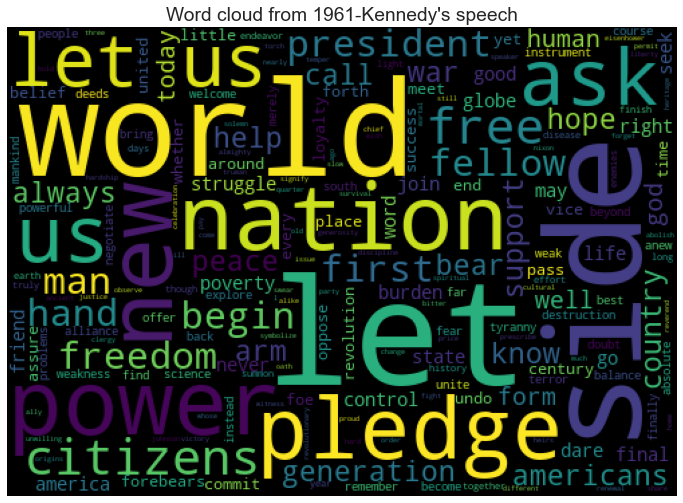

In [198]:
wordcloud1 = WordCloud(width=500, height=350, random_state=21, max_font_size=110).generate(new_text1)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Word cloud from 1961-Kennedy's speech")
plt.show()

In [199]:
text_tokens = word_tokenize(nltk.corpus.inaugural.raw('1973-Nixon.txt'))
text_tokens_text = " ".join(text_tokens)
stem_sentence=[lemmatizer.lemmatize(word,pos="v") for word in text_tokens]
tokens_without_sw = [w.lower() for w in stem_sentence if not w.lower() in stopwords]
tokens_without_sw1 = [w.lower() for w in tokens_without_sw if not w.lower() in my_stop_words]
new_text2 = " ".join(tokens_without_sw1)
print("After stopwords and lemmatization from 1973-Nixon's speech")
print("-------------------")
new_text2

After stopwords and lemmatization from 1973-Nixon's speech
-------------------


'vice president speaker chief justice senator cook eisenhower fellow citizens great good country share together meet four years ago america bleak spirit depress prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation lead stagnation home invite new danger abroad let us resolve become time great responsibilities greatly bear renew spirit promise america enter third century nation past year saw far-reaching result new policies peace continue revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remember year greatest progress since end world war ii toward last peace world peace seek world flimsy peace merely interlude war peace endure generations come important understand necessity limitations america role maintain pea

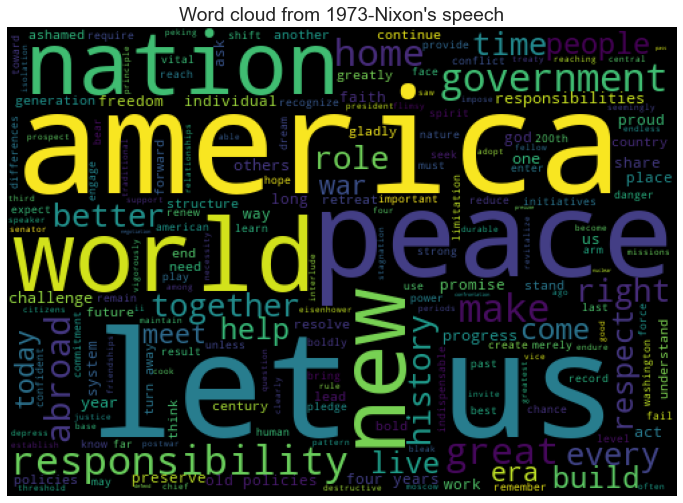

In [200]:
wordcloud2 = WordCloud(width=500, height=350, random_state=21, max_font_size=110).generate(new_text2)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Word cloud from 1973-Nixon's speech")
plt.show()

In [ ]:
# THE END